# МНК (метод наименьших квадратов)
### Выполнила: Иванова Елизавета Дмитриевна, НПМбд-01-19

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Дана функция $ f(x) = \sin\frac{x}{5}e^\frac{x}{10} + 5e^{-\frac{x}{2}} $ на отрезке $ x\in[1,15] $.

In [2]:
def f(x):
    return np.sin(x/5)*np.exp(x/10)+5*np.exp((-1/2)*x)

## 1. Полиномиальная регрессия 

Многочлен  степени $ n-1: a(x) = w_0 + w_1x_1 + w_2x_1^2 +  ... + w_{n-1}x_1^{n-1} $ однозначно определяется любыми $ n $ различными точками, через которые он проходит. Это значит, что его $ n $ неизвестных коэффициентов $ w_0, w_1, ... , w_{n-1} $ можно определить из следующей системы линейных уравнений: 

$ \left\{
    \begin{array}\\
        w_0 + w_1x_1 + w_2x_1^2 +  ... + w_{n-1}x_1^{n-1} = f(x_1)\\
        ... & (1)\\
        w_0 + w_1x_n + w_2x_n^2 +  ... + w_{n-1}x_n^{n-1} = f(x_n)\\
    \end{array}
\right. 
$


$ x_0, x_1, ... , x_n $  –  точки,  через  которые  проходит  многочлен,
$ f(x_0), f(x_1), ... , f(x_n) $ — значения, которые он должен принимать в этих точках. 

In [3]:
def compute_polynomial_coeffs(xx, yy):
    
    # xx, yy – набор точек и значений неизвестной функции
    
    n = len(xx) # количество точек
    b = yy
    A = np.zeros((n,n))
    
    for i in range(n):
        A[:,i] = xx**i # все столбцы, только i-я строка
    
    w = np.linalg.solve(A, b)
    
    return np.linalg.solve(A, b)

Функция compute_polynomial_coeffs получает на вход набор точек неизвестной функции и находит коэффициенты $ w_0, w_1, ... , w_{n-1} $ с помощью решения системы $ Ax=b $, где $ A = \begin{pmatrix}
1 & x_1^{(1)} & ... & x_n^{(1)}\\
1 & x_1^{(2)} & ... & x_n^{(2)}\\
... & ... & ... & ...\\
1 & x_1^{(M)} & ... & x_n^{(M)}\\
\end{pmatrix}$, $ x = \begin{pmatrix}
w_1\\
w_2\\
...\\
w_n\\
\end{pmatrix}$ , $ b = \begin{pmatrix}
y^{(1)}\\
y^{(2)}\\
...\\
y^{(M)}\\
\end{pmatrix}$. 


$ M $ – количество уравнений, $ n $ – количество точек.

In [4]:
def polynome(w, x): # w – вектор, х – точка
    
    n = len(w) # количество коэффициентов
    result = 0
    
    for i in range(n): 
        result += w[i] * x**i
    
    return result

Функция polynome выводит полином с найденными коэффициентами $ w_0, w_1, ... , w_{n-1} $.

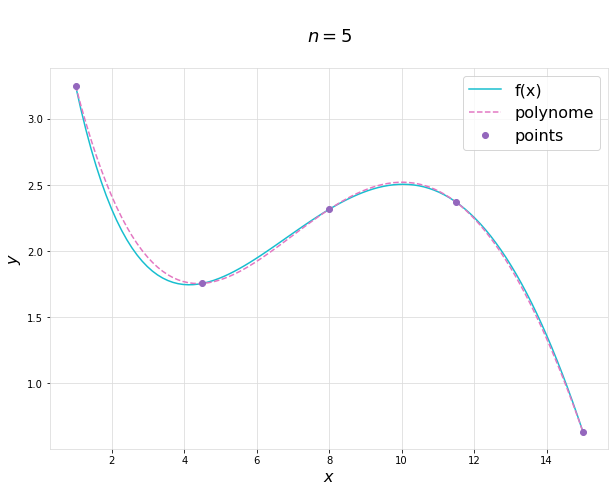

In [5]:
n = 5

x_points = np.linspace(1, 15, n)
y_points = f(x_points)
w = compute_polynomial_coeffs(x_points, y_points)

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title('\n$n=5$\n', fontsize = 18)
ax.set_xlabel(r'$x$', fontsize = 16)
ax.set_ylabel(r'$y$', fontsize = 16)

xx = np.linspace(1, 15, 100)
ax.plot(xx, f(xx), label='f(x)', color = 'C9')

xx = np.linspace(1, 15, 100)
ax.plot(xx, polynome(w, xx), '--', label='polynome', color = 'C6')

ax.plot(x_points, y_points, 'o', label='points', color = 'C4')

plt.legend(fontsize = 16)

ax.grid(color = 'gainsboro')
ax.spines['right'].set_color('gainsboro')
ax.spines['top'].set_color('gainsboro')
ax.spines['left'].set_color('gainsboro')
ax.spines['bottom'].set_color('gainsboro')

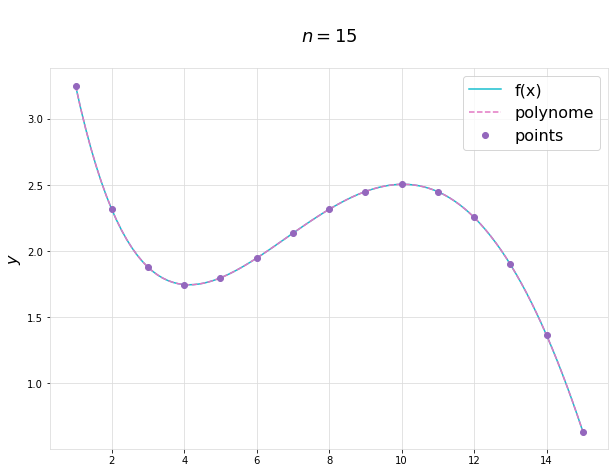

In [6]:
n = 15

x_points = np.linspace(1, 15, n)
y_points = f(x_points)
w = compute_polynomial_coeffs(x_points, y_points)

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title('\n$n=15$\n', fontsize = 18)
ax.set_ylabel(r'$y$', fontsize = 16)

xx = np.linspace(1, 15, 100)
ax.plot(xx, f(xx), label='f(x)', color = 'C9')

xx = np.linspace(1, 15, 100)
ax.plot(xx, polynome(w, xx), '--', label='polynome', color = 'C6')

ax.plot(x_points, y_points, 'o', label='points', color = 'C4')

plt.legend(fontsize = 16)

ax.grid(color = 'gainsboro')
ax.spines['right'].set_color('gainsboro')
ax.spines['top'].set_color('gainsboro')
ax.spines['left'].set_color('gainsboro')
ax.spines['bottom'].set_color('gainsboro')

При $ n=5 $ графики полинома и исходной функции отличаются, при $ n=15 $ – почти совпадают.

## 2. Полиномиальная регрессия с зашумлённым данными

Рассмотрим случай, когда значение функции $ f $ известно с некоторой неточностью. Для этого  добавим  к  значениям  функции $ f(x_i) $ случайный  шум, который генирируетя из гауссового распределения с нулевым средним и стандартным отклонением $ \sigma=0.01 $. 

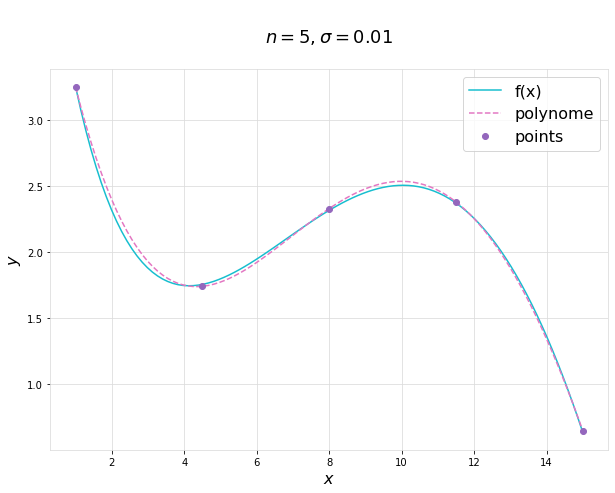

In [7]:
n = 5
noise = 0.01

x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise
w = compute_polynomial_coeffs(x_points, y_points)

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title('\n$n=5, \sigma = 0.01$\n', fontsize = 18)
ax.set_xlabel(r'$x$', fontsize = 16)
ax.set_ylabel(r'$y$', fontsize = 16)

xx = np.linspace(1, 15, 100)
ax.plot(xx, f(xx), label='f(x)', color = 'C9')

xx = np.linspace(1, 15, 100)
ax.plot(xx, polynome(w, xx), '--', label='polynome', color = 'C6')

ax.plot(x_points, y_points, 'o', label='points', color = 'C4')

plt.legend(fontsize = 16)

ax.grid(color = 'gainsboro')
ax.spines['right'].set_color('gainsboro')
ax.spines['top'].set_color('gainsboro')
ax.spines['left'].set_color('gainsboro')
ax.spines['bottom'].set_color('gainsboro')

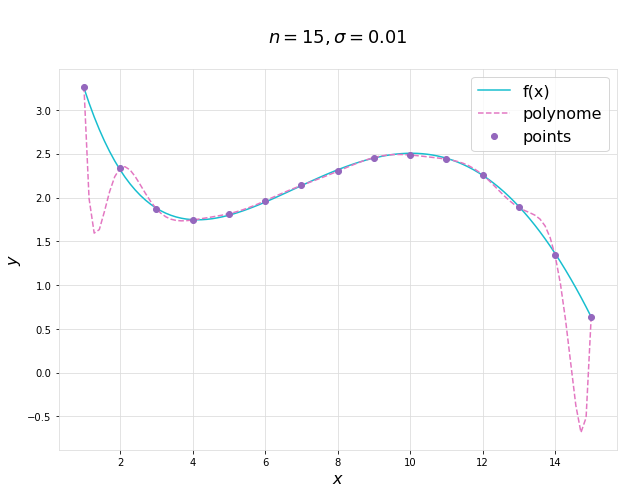

In [8]:
n = 15
noise = 0.01

x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise
w = compute_polynomial_coeffs(x_points, y_points)

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title('\n$n=15, \sigma = 0.01$\n', fontsize = 18)
ax.set_xlabel(r'$x$', fontsize = 16)
ax.set_ylabel(r'$y$', fontsize = 16)

xx = np.linspace(1, 15, 100)
ax.plot(xx, f(xx), label='f(x)', color = 'C9')

xx = np.linspace(1, 15, 100)
ax.plot(xx, polynome(w, xx), '--', label='polynome', color = 'C6')

ax.plot(x_points, y_points, 'o', label='points', color = 'C4')

plt.legend(fontsize = 16)

ax.grid(color = 'gainsboro')
ax.spines['right'].set_color('gainsboro')
ax.spines['top'].set_color('gainsboro')
ax.spines['left'].set_color('gainsboro')
ax.spines['bottom'].set_color('gainsboro')

При добавлении шума точки исходной функции и точки, в которых были посчитаны значения полинома, совпадают, а между этими точками, особенно на концах графика, происходит значительное отклонение значений полинома от исходных значений функции.
Можем заметить, что при увеличении количества точек аппроксимация становится хуже даже при низких значениях шума. Это происходит из-за того, что число обусловленности $ \mu(A)=\parallel A \parallel+\parallel A^{-1} \parallel (\mu(A)\geq1) $ велико, то есть матрица становится плохо обуловленной (чем больше $ \mu(A) $ , тем больше погрешности решения относительно погрешностей в условии).

## 3. Метод наименьших квадратов

Пусть  количество  точек  равно $ N $,  а полином по-прежнему имеет вид $ a(x) = w_0 + w_1x_1 + w_2x_1^2 +  ... + w_{n-1}x_1^{n-1}, N>n$. 

Тогда в  СЛАУ вида $ (1) $ количество уравнений будет больше, чем число неизвестных ($ M>n $). В таких случаях обычно решают задачу минимизации невязки уравнений: 

$$ \min_x \parallel Ax-b \parallel $$

где в качестве нормы $ \parallel \cdot \parallel $ обычно используют квадратичную норму. Поэтому такой подход называют методом наименьших квадратов. 

In [9]:
def Least_square_method(xx, yy):
    
    # xx, yy – набор точек и значений неизвестной функции
    
    n = 3 # степень кубического полинома
    N = len(xx)
    b = yy
    A = np.zeros((N,n + 1))
    
    for i in range(n + 1):
        A[:,i] = xx**i # все столбцы, только i-я строка
    
    return np.linalg.inv(np.transpose(A).dot(A)).dot(np.transpose(A)).dot(b)

Находим решение с помощью псевдо-обратной матрицы Мура-Пенроуза: 

$ x_0 = (A^TA)^{-1}A^Tb = A^+b $

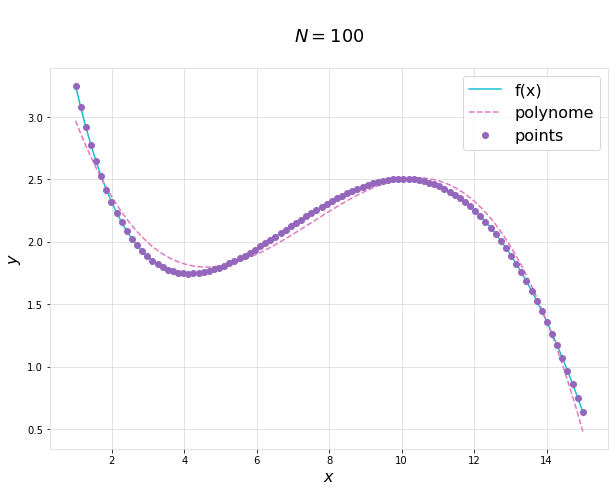

In [10]:
# без шума

N = 100

x_points = np.linspace(1, 15, N)
y_points = f(x_points)
w = Least_square_method(x_points, y_points)

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title('\n$N=100$\n', fontsize = 18)
ax.set_xlabel(r'$x$', fontsize = 16)
ax.set_ylabel(r'$y$', fontsize = 16)

xx = np.linspace(1, 15, 100)
ax.plot(xx, f(xx), label='f(x)', color = 'C9')

xx = np.linspace(1, 15, 100)
ax.plot(xx, polynome(w, xx), '--', label='polynome', color = 'C6')

ax.plot(x_points, y_points, 'o', label='points', color = 'C4')

plt.legend(fontsize = 16)

ax.grid(color = 'gainsboro')
ax.spines['right'].set_color('gainsboro')
ax.spines['top'].set_color('gainsboro')
ax.spines['left'].set_color('gainsboro')
ax.spines['bottom'].set_color('gainsboro')

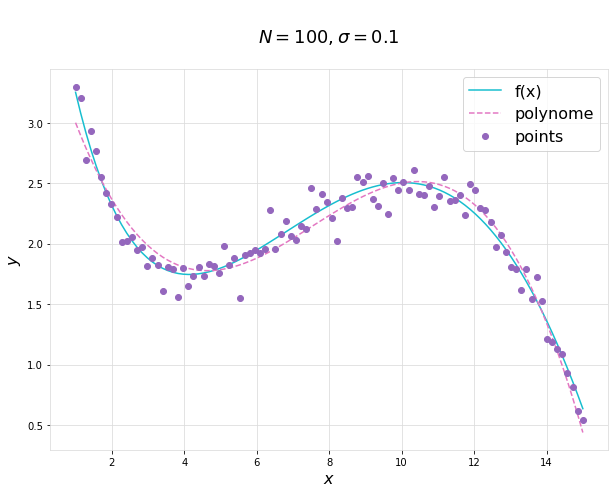

In [11]:
# с шумом

N = 100
noise = 0.1

x_points = np.linspace(1, 15, N)
y_points = f(x_points) + np.random.randn(N) * noise
w = Least_square_method(x_points, y_points)

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title('\n$N=100, \sigma = 0.1$\n', fontsize = 18)
ax.set_xlabel(r'$x$', fontsize = 16)
ax.set_ylabel(r'$y$', fontsize = 16)

xx = np.linspace(1, 15, 100)
ax.plot(xx, f(xx), label='f(x)', color = 'C9')

xx = np.linspace(1, 15, 100)
ax.plot(xx, polynome(w, xx), '--', label='polynome', color = 'C6')

ax.plot(x_points, y_points, 'o', label='points', color = 'C4')

plt.legend(fontsize = 16)

ax.grid(color = 'gainsboro')
ax.spines['right'].set_color('gainsboro')
ax.spines['top'].set_color('gainsboro')
ax.spines['left'].set_color('gainsboro')
ax.spines['bottom'].set_color('gainsboro')

Несмотря на шум и большое количество точек, полином в степени $ n=4 $ аппроксимирует достаточно точно при применении метода наименьших квадратов.

## Вывод:

Полиномиальная регрессия: хорошо аппроксимирует при небольшом количестве точек и при отсутствии шумов, аппроксимация становится хуже даже при низких значениях шума. 

Метод наименьших квадратов: аппроксимирует достаточно точно, позволяет строить полиномы  с небольшими значениями степеней и с большим количеством точек, аппроксимация не становится хуже при добавлении шума.